# Problem Statement

California is a large and diverse state with 58 counties greatly different geographically, and demographically. These counties also produce varying educational outcomes for its youth.

The goal of this study is to identify the counties that have the worst and best overall student performance on the SAT and ACT tests, to determine which counties are in most need of educational resources, and which ones can be scaled back. Furthermore, it seeks to identify county-level demographic indicators, which may be useful in predicting SAT and ACT participation rates and performance in the future. 

# Importing and Cleaning Data 

I start by importing essential libraries, including a custom library provided by my instructor Gwen, which simplifies data visualization production. This is followed by the importation of the datasets, in .csv format, that we will be examining.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utilities.graphing_utils as utl

pd.set_option("display.max_columns", 60)

In [2]:
sat_df = pd.read_csv('../data/sat_2019_ca.csv')
act_df = pd.read_csv('../data/act_2019_ca.csv')


#is there some way to automate importing all csvs in a folder?
census_main_df = pd.read_csv('../data/cubit_census_data/countys2.csv')
census_age_df = pd.read_csv('../data/cubit_census_data/census_age.csv')
census_income_df = pd.read_csv('../data/cubit_census_data/census_income.csv')
census_education_df = pd.read_csv('../data/cubit_census_data/census_education.csv')
census_race_df = pd.read_csv('../data/cubit_census_data/census_race.csv')
census_house_df = pd.read_csv('../data/cubit_census_data/census_house.csv')

I look at the 10 top and bottom rows of the datasets to get an idea of how the data looks on a row by row basis and see if anything initally sticks out.

In [3]:
sat_df.head(10)

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,Enroll11,NumTSTTakr11,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,NaN,NaN,NaN,NaN,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,*,*,*,*,26.0,6.0,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31,30.39,14,13.73,219.0,174.0,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54,47.79,18,15.93,333.0,275.0,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,*,*,*,*,17.0,5.0,*,*,*,*,*,*,*,*,2018-19,NaN
5,1.964734e+13,19.0,1964733.0,6061451.0,S,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,68,64.15,36,33.96,187.0,183.0,91,49.73,47,25.68,36,33.96,44,24.04,2018-19,NaN
6,3.073635e+13,30.0,3073635.0,3034956.0,S,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,161,84.74,138,72.63,503.0,223.0,206,92.38,176,78.92,132,69.47,172,77.13,2018-19,NaN
7,3.367215e+13,33.0,3367215.0,3336955.0,S,Abraham Lincoln Continuation,Riverside Unified,Riverside,114.0,17.0,3,17.65,2,11.76,83.0,0.0,NaN,NaN,NaN,NaN,2,11.76,NaN,NaN,2018-19,NaN
8,1.363107e+13,13.0,1363107.0,1332501.0,S,Calipatria High,Calipatria Unified,Imperial,91.0,27.0,14,51.85,6,22.22,92.0,11.0,*,*,*,*,5,18.52,*,*,2018-19,NaN
9,1.964733e+13,19.0,1964733.0,119685.0,S,New Open World Academy K-12,Los Angeles Unified,Los Angeles,85.0,68.0,17,25.00,6,8.82,79.0,79.0,22,27.85,10,12.66,6,8.82,6,7.59,2018-19,NaN


In [4]:
act_df.head(10)

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN
5,1.976968e+13,19.0,1976968.0,109926.0,S,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,15,15,17,16,3,9.09,2018-19,NaN
6,1.964733e+13,19.0,1964733.0,126615.0,S,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,18,18,18,17,5,31.25,2018-19,NaN
7,1.964246e+13,19.0,1964246.0,126003.0,S,Academies of the Antelope Valley,Antelope Valley Union High,Los Angeles,14.0,1.0,*,*,*,*,*,*,2018-19,NaN
8,3.868478e+13,38.0,3868478.0,119958.0,S,Academy (The)- SF @McAteer,San Francisco Unified,San Francisco,84.0,9.0,*,*,*,*,*,*,2018-19,NaN
9,3.675077e+13,36.0,3675077.0,3631207.0,S,Academy for Academic Excellence,Apple Valley Unified,San Bernardino,97.0,13.0,*,*,*,*,*,*,2018-19,NaN


Then zoom out to get a big picture view and see the scale of the dataset

In [5]:
sat_df.shape

(2580, 26)

In [6]:
act_df.shape

(2310, 18)

Find the holes in the dataset and tally up the null values per column 

In [7]:
sat_df.isnull().sum()

CDS                         1
CCode                       1
CDCode                      1
SCode                       1
RType                       1
SName                     598
DName                      59
CName                       1
Enroll12                    1
NumTSTTakr12                1
NumERWBenchmark12         276
PctERWBenchmark12         276
NumMathBenchmark12        276
PctMathBenchmark12        276
Enroll11                    1
NumTSTTakr11                1
NumERWBenchmark11         311
PctERWBenchmark11         311
NumMathBenchmark11        311
PctMathBenchmark11        311
TotNumBothBenchmark12     276
PctBothBenchmark12        276
TotNumBothBenchmark11     311
PctBothBenchmark11        311
Year                        1
Unnamed: 25              2580
dtype: int64

In [8]:
act_df.isnull().sum()

CDS               1
CCode             1
CDCode            1
SCode           523
RType             1
SName           581
DName            59
CName             1
Enroll12          1
NumTstTakr        1
AvgScrRead      357
AvgScrEng       357
AvgScrMath      357
AvgScrSci       357
NumGE21         357
PctGE21         357
Year              1
Unnamed: 17    2310
dtype: int64

Then I check on the datatypes, while reaffirming my shaper and null composition. 

In [9]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   CCode                  2579 non-null   float64
 2   CDCode                 2579 non-null   float64
 3   SCode                  2579 non-null   float64
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      2304 non-null   object 
 11  PctERWBenchmark12      2304 non-null   object 
 12  NumMathBenchmark12     2304 non-null   object 
 13  PctMathBenchmark12     2304 non-null   object 
 14  Enroll11               2579 non-null   float64
 15  NumT

In [10]:
act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CDS          2309 non-null   float64
 1   CCode        2309 non-null   float64
 2   CDCode       2309 non-null   float64
 3   SCode        1787 non-null   float64
 4   RType        2309 non-null   object 
 5   SName        1729 non-null   object 
 6   DName        2251 non-null   object 
 7   CName        2309 non-null   object 
 8   Enroll12     2309 non-null   float64
 9   NumTstTakr   2309 non-null   float64
 10  AvgScrRead   1953 non-null   object 
 11  AvgScrEng    1953 non-null   object 
 12  AvgScrMath   1953 non-null   object 
 13  AvgScrSci    1953 non-null   object 
 14  NumGE21      1953 non-null   object 
 15  PctGE21      1953 non-null   object 
 16  Year         2309 non-null   object 
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(7), object(11)
memory usage: 325.0+ K

This is where I begin the filtering process, focusing on the pre-aggregated data found under the county level record type.

In [11]:
sat_df = sat_df.loc[sat_df['RType'] == "C"]

In [12]:
act_df = act_df.loc[act_df['RType'] == "C"]

Removing unnessary columns

In [13]:
#if i could drop column based on part of string (ie, if [column_name] in 'Num') then .drop?
sat_df.drop(sat_df.iloc[:,0:7], inplace=True, axis =1) 
sat_df.drop(sat_df.iloc[:,7:13], inplace=True, axis =1)
sat_df.drop(sat_df.iloc[:,9:], inplace=True, axis =1)

In [14]:
act_df.drop(act_df.iloc[:,0:7], inplace=True, axis =1)
act_df.drop(act_df.iloc[:,9:], inplace=True, axis =1)

Counties that reported less than 15 total test takers had no descriptive information to offer to the study, and were dropped. Consequently, this helped get rid of the rest of our null values. 

In [15]:
sat_df = sat_df.loc[sat_df['NumTSTTakr12'] > 15]

In [16]:
act_df = act_df.loc[act_df['NumTstTakr'] > 15]

Rexamining the null value composition, data types, and new shape of the dataset

In [17]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1981 to 2578
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CName                  55 non-null     object 
 1   Enroll12               55 non-null     float64
 2   NumTSTTakr12           55 non-null     float64
 3   NumERWBenchmark12      55 non-null     object 
 4   PctERWBenchmark12      55 non-null     object 
 5   NumMathBenchmark12     55 non-null     object 
 6   PctMathBenchmark12     55 non-null     object 
 7   TotNumBothBenchmark12  55 non-null     object 
 8   PctBothBenchmark12     55 non-null     object 
dtypes: float64(2), object(7)
memory usage: 4.3+ KB


In [18]:
act_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1064 to 1121
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CName       53 non-null     object 
 1   Enroll12    53 non-null     float64
 2   NumTstTakr  53 non-null     float64
 3   AvgScrRead  53 non-null     object 
 4   AvgScrEng   53 non-null     object 
 5   AvgScrMath  53 non-null     object 
 6   AvgScrSci   53 non-null     object 
 7   NumGE21     53 non-null     object 
 8   PctGE21     53 non-null     object 
dtypes: float64(2), object(7)
memory usage: 4.1+ KB


There are many columns that are cast as the wrong data types, (ie, columns to be aggregated are currently objects and must be converted to numerics - floats and integers)
To convert object to floats, I'm going to use a function I made. To convert to integer, I'm going to call on the to_numeric function form the pandas library, and the as type method.

In [19]:
def prct_to_decimal(string):
    stringl = list(string)
    for i in stringl:
        if i in "%":
            stringl.remove("%")
        if i in ".":        
            stringl.remove(".")
        pass
    string2 = ["."] + stringl
    string3 = "".join(string2)
    string4 = str(string3)
    string5 = round(float(string4),3)
    return string5

prct_to_decimal("50.543%")

0.505

In [20]:
sat_df['PctERWBenchmark12'] = sat_df['PctERWBenchmark12'].apply(prct_to_decimal)

In [21]:
sat_df['PctMathBenchmark12'] = sat_df['PctMathBenchmark12'].apply(prct_to_decimal)

In [22]:
sat_df['PctBothBenchmark12'] = sat_df['PctBothBenchmark12'].apply(prct_to_decimal)

In [23]:
#I picked up this technique on StackOverflow.com
sat_df['NumERWBenchmark12'] = pd.to_numeric(sat_df['NumERWBenchmark12'])
sat_df['NumMathBenchmark12'] = pd.to_numeric(sat_df['NumMathBenchmark12'])
sat_df['TotNumBothBenchmark12'] = pd.to_numeric(sat_df['TotNumBothBenchmark12'])

In [24]:
#is there a more efficient way to do this?
act_df['Enroll12'] = act_df['Enroll12'].astype(int) 
act_df['NumTstTakr'] = act_df['NumTstTakr'].astype(int)
act_df['AvgScrRead'] = act_df['AvgScrRead'].astype(int)
act_df['AvgScrEng'] = act_df['AvgScrEng'].astype(int)
act_df['AvgScrMath'] = act_df['AvgScrMath'].astype(int)
act_df['AvgScrSci'] = act_df['AvgScrSci'].astype(int)
act_df['NumGE21'] = act_df['NumGE21'].astype(int)

I drop the remaining absolute value columns, in the cases where I have corresponding relative value columns. 

In [25]:
sat_df.drop(['NumMathBenchmark12'], inplace=True, axis=1)
sat_df.drop(['NumERWBenchmark12'], inplace=True, axis=1)
sat_df.drop(['TotNumBothBenchmark12'], inplace=True, axis=1)

In [26]:
act_df.drop(['NumGE21'], inplace=True, axis=1)

In [27]:
act_df['PctGE21'] = act_df['PctGE21'].apply(prct_to_decimal)

I rename the columns, with more ledgible and easily callable names.

In [28]:
#is there a more efficient way to do this?
sat_df.rename(columns={'CName':'county_name', 
 'Enroll12':'twelfth_grade_enrollment_sat',
 'NumTSTTakr12': 'num_test_takers_sat',
 'NumERWBenchmark12' : 'num_ewr_benchmark_sat',
 'PctERWBenchmark12': 'prct_ewr_benchmark_sat',
 'NumMathBenchmark12': 'num_math_benchmark_sat',
 'PctMathBenchmark12': 'prct_math_benchmark12_sat',
 'TotNumBothBenchmark12': 'num_both_benchmark_sat',
 'PctBothBenchmark12':'prct_both_benchmark_sat'}, inplace=True)

In [29]:
act_df.rename(columns={'CName': 'county_name',
 'Enroll12' : 'twelfth_grade_enrollment',
 'NumTstTakr': 'num_test_takers',
 'AvgScrRead': 'avg_english_score_act',
 'AvgScrEng': 'avg_reading_score_act',
 'AvgScrMath': 'avg_math_score_act',
 'AvgScrSci': 'avg_science_score_act',
 'NumGE21': 'num_comp_score_21plus',
 'PctGE21': 'pct_comp_score_21plus'}, inplace = True)

In [30]:
print(list(act_df.columns))

['county_name', 'twelfth_grade_enrollment', 'num_test_takers', 'avg_english_score_act', 'avg_reading_score_act', 'avg_math_score_act', 'avg_science_score_act', 'pct_comp_score_21plus']


In [31]:
print(list(act_df.columns))

['county_name', 'twelfth_grade_enrollment', 'num_test_takers', 'avg_english_score_act', 'avg_reading_score_act', 'avg_math_score_act', 'avg_science_score_act', 'pct_comp_score_21plus']


Rexamine the null value composition, data types, and new shape of the dataset one last time.

In [32]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1981 to 2578
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   county_name                   55 non-null     object 
 1   twelfth_grade_enrollment_sat  55 non-null     float64
 2   num_test_takers_sat           55 non-null     float64
 3   prct_ewr_benchmark_sat        55 non-null     float64
 4   prct_math_benchmark12_sat     55 non-null     float64
 5   prct_both_benchmark_sat       55 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.0+ KB


In [33]:
act_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1064 to 1121
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   county_name               53 non-null     object 
 1   twelfth_grade_enrollment  53 non-null     int64  
 2   num_test_takers           53 non-null     int64  
 3   avg_english_score_act     53 non-null     int64  
 4   avg_reading_score_act     53 non-null     int64  
 5   avg_math_score_act        53 non-null     int64  
 6   avg_science_score_act     53 non-null     int64  
 7   pct_comp_score_21plus     53 non-null     float64
dtypes: float64(1), int64(6), object(1)
memory usage: 3.7+ KB


# Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_name**|*object*|sat_2019_ca.csv|Name of County|
|**twelfth_grade_enrollment_sat**|*integer*|sat_2019_ca.csv|Enrollment of Grade 12|
|**num_test_takers_sat**|*integer*|sat_2019_ca.csv|Number of Test Takers Grade 12|
|**prct_ewr_benchmark_sat**|*float*|sat_2019_ca.csv|The percent of students who met or exceeded the benchmark for Evidence-Based Reading & Writing (ERW) test for Grade 12.
|**prct_math_benchmark12_sat**|*float*|sat_2019_ca.csv|	The percent of students who met or exceeded the benchmark for SAT Math test for Grade 12.
|**prct_both_benchmark_sat**|*float*|sat_2019_ca.csv|The percent of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math Grade 12.|
|**twelfth_grade_enrollment**|*integer*|act_2019_ca.csv|Enrollment of Grade 12|
|**num_test_takers**|*integer*|act_2019.ca.csv|Number of Test Takers|
|**avg_english_score_act**|*integer*|act_2019.ca.csv|Average ACT English Score|
|**avg_reading_score_act**|*integer*|act_2019.ca.csv|Average ACT Reading Score|
|**avg_math_score_act**|*integer*|act_2019.ca.csv|Average ACT Math Score|
|**avg_science_score_act**|*integer*|act_2019.ca.csv|Average ACT Science Score|
|**pct_comp_score_21plus**|*float*|act_2019.ca.csv|Percent of Test Takers Whose ACT Composite Scores Are Greater or Equal to 21|


# Exploratory Data Analysis

Now that we have a clean datasets with no nulls and the columns as their correct datatypes, 
we can confidently run some basic descriptive statistics on them, and begin our exploratory data analysis. 

In [34]:
round(sat_df.describe(),2)

,twelfth_grade_enrollment_sat,num_test_takers_sat,prct_ewr_benchmark_sat,prct_math_benchmark12_sat,prct_both_benchmark_sat
count,55.00,55.00,55.00,55.00,55.00
mean,8899.51,3098.05,0.74,0.52,0.50
std,17703.52,7238.65,0.10,0.13,0.13
min,87.00,16.00,0.53,0.20,0.19
25%,677.50,138.00,0.67,0.41,0.38
50%,2551.00,630.00,0.75,0.53,0.51
75%,8314.50,2743.00,0.82,0.62,0.60
max,114618.00,48676.00,0.92,0.76,0.73


In [35]:
act_df.describe()

,twelfth_grade_enrollment,num_test_takers,avg_english_score_act,avg_reading_score_act,avg_math_score_act,avg_science_score_act,pct_comp_score_21plus
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,9225.415094,1559.169811,22.622642,21.490566,21.792453,21.698113,0.564472
std,17958.051687,3280.764491,2.482449,2.591574,2.151551,2.052999,0.172002
min,87.000000,16.000000,17.000000,15.000000,17.000000,18.000000,0.200000
25%,885.000000,76.000000,21.000000,20.000000,20.000000,20.000000,0.433000
50%,2647.000000,465.000000,23.000000,22.000000,22.000000,22.000000,0.597000
75%,9071.000000,1292.000000,25.000000,24.000000,24.000000,24.000000,0.707000
max,114618.000000,20678.000000,27.000000,27.000000,26.000000,26.000000,0.871000


I want a dictionary that contatins the column names of the dataset as the keys; 
and the respective aggregated standard deviations as the values. I first use a nested function to calucalate the standard deviation

In [36]:
def get_mean(list1):
    mean = sum(list1)/len(list1)
    return mean
listm = [1,2,3,4,5]
get_mean(listm)

def stand_dev(list2):
    nums2 = [i - get_mean(list2) for i in list2]
    nums3 = [i ** 2 for i in nums2]
    totaln = sum(nums3)
    inside = totaln/len(list2)
    alln = inside ** .5
    return alln

 ...And then use a dictionary comprehension to apply the calculation on each of the columns and store the results in dictionary

In [37]:
column_name_list_sat = list((sat_df.columns)[1:])
sd_sat = {i:round(stand_dev(sat_df[i]),2) for i in column_name_list_sat}
print(sd_sat)

{'twelfth_grade_enrollment_sat': 17541.84, 'num_test_takers_sat': 7172.55, 'prct_ewr_benchmark_sat': 0.1, 'prct_math_benchmark12_sat': 0.13, 'prct_both_benchmark_sat': 0.13}


In [38]:
column_name_list_act = list((act_df.columns)[1:])
sd_act = {i:round(stand_dev(act_df[i]),2) for i in column_name_list_act}
print(sd_act)

{'twelfth_grade_enrollment': 17787.83, 'num_test_takers': 3249.67, 'avg_english_score_act': 2.46, 'avg_reading_score_act': 2.57, 'avg_math_score_act': 2.13, 'avg_science_score_act': 2.03, 'pct_comp_score_21plus': 0.17}


I created a column that would aggregate the rate that enolled students 
participated in the ACT and SAT, respectively.

In [39]:
sat_df['participation_rate_sat'] = sat_df['num_test_takers_sat']/sat_df['twelfth_grade_enrollment_sat']

In [40]:
act_df['participation_rate_act'] = act_df['num_test_takers']/act_df['twelfth_grade_enrollment']

In [41]:
sat_df.to_csv(path_or_buf= "../new_sat_df.csv")

In [42]:
act_df.to_csv(path_or_buf= "../new_act_df.csv")

Here I took California county-level data retrieved from Cubit.com. Find out more about their sources and methodology [here.](https://demographics-by-cubit.helpscoutdocs.com/category/38-data-questions)
The county-level data was divided up into five sheets: 
Age, Income, Race, Education, and Household   
I combined these smaller .csv files in with my test data using the merge function; and county name as my key value. 
I did not merge my SAT and ACT datasets, because if I left merged the SAT and ACT datasets, I would end up with nulls from the right table; alternatively, if I right merged I would lose rows from the SAT table. 

In [43]:
#there must be a more effiencent way to do this

In [44]:
sat_census_df = pd.merge(census_main_df, sat_df, on = "county_name")

In [45]:
act_census_df = pd.merge(census_main_df, act_df, on = "county_name")

In [46]:
sat_census_age_df = pd.merge(census_age_df, sat_df, on = "county_name")

In [47]:
act_census_age_df = pd.merge(census_age_df, act_df, on = "county_name")

In [48]:
sat_census_income_df = pd.merge(census_income_df, sat_df, on = "county_name")

In [49]:
act_census_income_df = pd.merge(census_income_df, act_df, on = "county_name")

In [50]:
sat_census_house_df = pd.merge(census_house_df, sat_df, on = "county_name")

In [51]:
act_census_house_df = pd.merge(census_house_df, act_df, on = "county_name")

In [52]:
sat_census_race_df = pd.merge(census_race_df, sat_df, on = "county_name")

In [53]:
act_census_race_df = pd.merge(census_race_df, act_df, on = "county_name")

In [54]:
sat_census_education_df = pd.merge(census_education_df, sat_df, on = "county_name")

In [55]:
act_census_education_df = pd.merge(census_education_df, act_df, on = "county_name")

In [56]:
pd.DataFrame.to_csv(sat_census_df, path_or_buf = "~/sat_census.csv")

In [57]:
pd.DataFrame.to_csv(act_census_df, path_or_buf = "~/act_census.csv")

I used sorting and masking methods to find out the counties that have the highest and lowest participation rates, performance rates.

Which counties performed best and worst on both portions of the SAT?

In [58]:
sat_df.sort_values('prct_both_benchmark_sat',ascending = False).head()

,county_name,twelfth_grade_enrollment_sat,num_test_takers_sat,prct_ewr_benchmark_sat,prct_math_benchmark12_sat,prct_both_benchmark_sat,participation_rate_sat
1981,El Dorado,2226.0,604.0,0.906,0.758,0.732,0.271339
1992,Mariposa,155.0,36.0,0.917,0.750,0.722,0.232258
1993,Placer,5931.0,1959.0,0.872,0.712,0.689,0.330298
1999,Marin,2647.0,965.0,0.886,0.698,0.688,0.364564
2010,Nevada,1869.0,186.0,0.855,0.704,0.683,0.099518


In [59]:
sat_df.sort_values('prct_both_benchmark_sat',ascending = False).tail()

,county_name,twelfth_grade_enrollment_sat,num_test_takers_sat,prct_ewr_benchmark_sat,prct_math_benchmark12_sat,prct_both_benchmark_sat,participation_rate_sat
2028,Inyo,548.0,88.0,0.534,0.352,0.318,0.160584
2014,Merced,4559.0,1195.0,0.615,0.320,0.291,0.262119
1983,Madera,2352.0,442.0,0.627,0.308,0.287,0.187925
2001,Glenn,500.0,90.0,0.644,0.300,0.278,0.180000
2027,Colusa,339.0,74.0,0.527,0.203,0.189,0.218289


Which counties performed best and worst on both portions of the ACT?

In [60]:
act_df.sort_values('pct_comp_score_21plus', ascending = False).head()

,county_name,twelfth_grade_enrollment,num_test_takers,avg_english_score_act,avg_reading_score_act,avg_math_score_act,avg_science_score_act,pct_comp_score_21plus,participation_rate_act
1069,Calaveras,451,31,26,24,24,24,0.871,0.068736
1072,Marin,2647,753,27,26,25,25,0.805,0.284473
1070,Mono,420,20,26,24,24,24,0.800,0.047619
1091,Amador,305,37,24,23,23,22,0.784,0.121311
1095,Tuolumne,518,23,26,23,23,23,0.783,0.044402


In [61]:
act_df.sort_values('pct_comp_score_21plus', ascending = False).tail()

,county_name,twelfth_grade_enrollment,num_test_takers,avg_english_score_act,avg_reading_score_act,avg_math_score_act,avg_science_score_act,pct_comp_score_21plus,participation_rate_act
1083,Madera,2352,375,19,18,19,19,0.333,0.159439
1119,Merced,4559,594,20,18,18,19,0.303,0.130292
1101,San Bernardino,31635,5418,18,17,19,18,0.286,0.171266
1080,Kings,2004,282,18,17,18,18,0.245,0.140719
1094,Modoc,87,55,17,15,17,18,0.200,0.632184


Which counties had the highest and lowest participation rates for the SAT?

In [62]:
sat_df[sat_df['participation_rate_sat'] > .4].sort_values('participation_rate_sat',ascending=False).head()

,county_name,twelfth_grade_enrollment_sat,num_test_takers_sat,prct_ewr_benchmark_sat,prct_math_benchmark12_sat,prct_both_benchmark_sat,participation_rate_sat
2578,San Francisco,4447.0,2256.0,0.700,0.612,0.553,0.507308
1998,San Mateo,7235.0,3113.0,0.774,0.625,0.597,0.430270
1982,Los Angeles,114618.0,48676.0,0.618,0.407,0.381,0.424680
2032,Ventura,10750.0,4534.0,0.621,0.456,0.434,0.421767
2035,Riverside,34277.0,14070.0,0.609,0.364,0.341,0.410479


In [63]:
sat_df[sat_df['participation_rate_sat'] < .4].sort_values('participation_rate_sat',ascending=False).tail()

,county_name,twelfth_grade_enrollment_sat,num_test_takers_sat,prct_ewr_benchmark_sat,prct_math_benchmark12_sat,prct_both_benchmark_sat,participation_rate_sat
2028,Inyo,548.0,88.0,0.534,0.352,0.318,0.160584
1994,Tuolumne,518.0,80.0,0.825,0.600,0.600,0.154440
2017,Tehama,688.0,91.0,0.758,0.582,0.571,0.132267
2010,Nevada,1869.0,186.0,0.855,0.704,0.683,0.099518
2015,Mono,420.0,37.0,0.865,0.568,0.568,0.088095


Which counties had the highest and lowest participation rates for the ACT?

In [64]:
act_df[act_df['participation_rate_act'] > .2].sort_values('participation_rate_act',ascending=False).head()

,county_name,twelfth_grade_enrollment,num_test_takers,avg_english_score_act,avg_reading_score_act,avg_math_score_act,avg_science_score_act,pct_comp_score_21plus,participation_rate_act
1094,Modoc,87,55,17,15,17,18,0.200,0.632184
1110,Tehama,688,302,19,18,19,19,0.348,0.438953
1072,Marin,2647,753,27,26,25,25,0.805,0.284473
1118,San Francisco,4447,1078,22,21,22,21,0.524,0.242411
1090,Contra Costa,14593,3183,25,25,24,24,0.707,0.218118


In [65]:
act_df[act_df['participation_rate_act'] < .2].sort_values('participation_rate_act',ascending=False).tail()

,county_name,twelfth_grade_enrollment,num_test_takers,avg_english_score_act,avg_reading_score_act,avg_math_score_act,avg_science_score_act,pct_comp_score_21plus,participation_rate_act
1098,Yuba,977,64,21,19,20,20,0.469,0.065507
1082,Inyo,548,28,23,22,22,22,0.679,0.051095
1070,Mono,420,20,26,24,24,24,0.800,0.047619
1095,Tuolumne,518,23,26,23,23,23,0.783,0.044402
1120,Nevada,1869,76,25,24,24,24,0.750,0.040663


# Data Visualization

## Test Variable Correlation Matrices

Before I added the demographic variables, I wanted a clear look at how the intra-dataset variables were correlated with each other. 

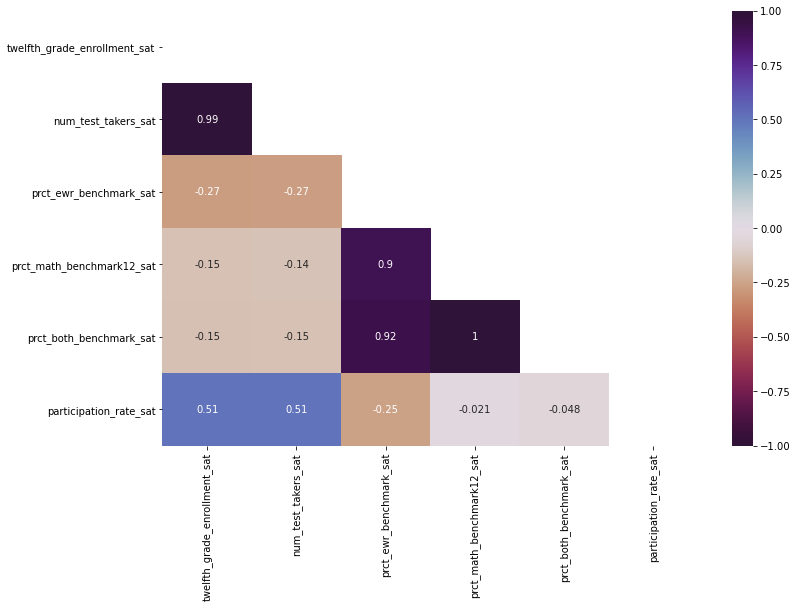

In [66]:
plt.figure(figsize = (12,8))

sat_corr = sat_df.corr()
sat_corr

mask = np.zeros_like(sat_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = sat_corr,
            annot = True, 
            vmin = -1,
            vmax = 1,
            mask = mask,
            cmap = 'twilight_shifted_r');

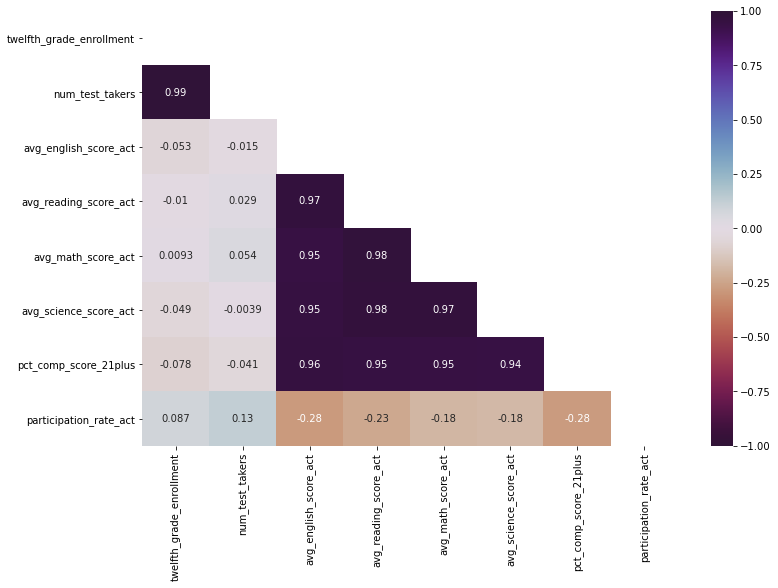

In [67]:
plt.figure(figsize = (12,8))

sat_corr = act_df.corr()
sat_corr

mask = np.zeros_like(sat_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = sat_corr,
            annot = True, 
            vmin = -1,
            vmax = 1,
            mask = mask,
            cmap = 'twilight_shifted_r');

All the varibles within the score categories had very strong correlations to one another.  
There was a strong correlation beteen the number of test takers and number of enrolled students for obvious reasons. SAT participation rates had a moderate correlation with test-takers and enrollment. ACT participation rates have weak but noteworthy correlations with average English scores and composite benchmark clearance rates. 

## SAT & Demographic Correlation Matices

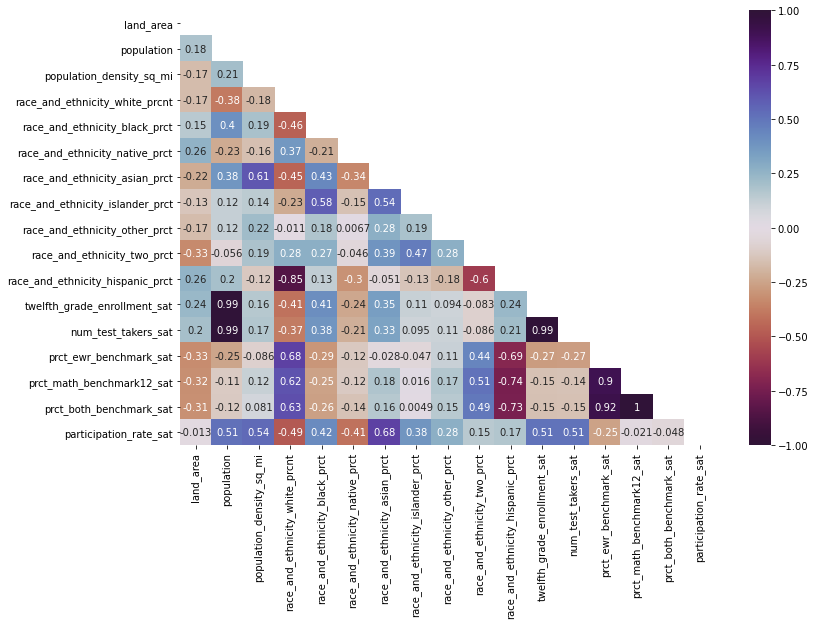

In [68]:
plt.figure(figsize = (12,8))

sat_corr = sat_census_race_df.corr()
sat_corr

mask = np.zeros_like(sat_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = sat_corr,
            annot = True, 
            vmin = -1,
            vmax = 1,
            mask = mask,
            cmap = 'twilight_shifted_r');

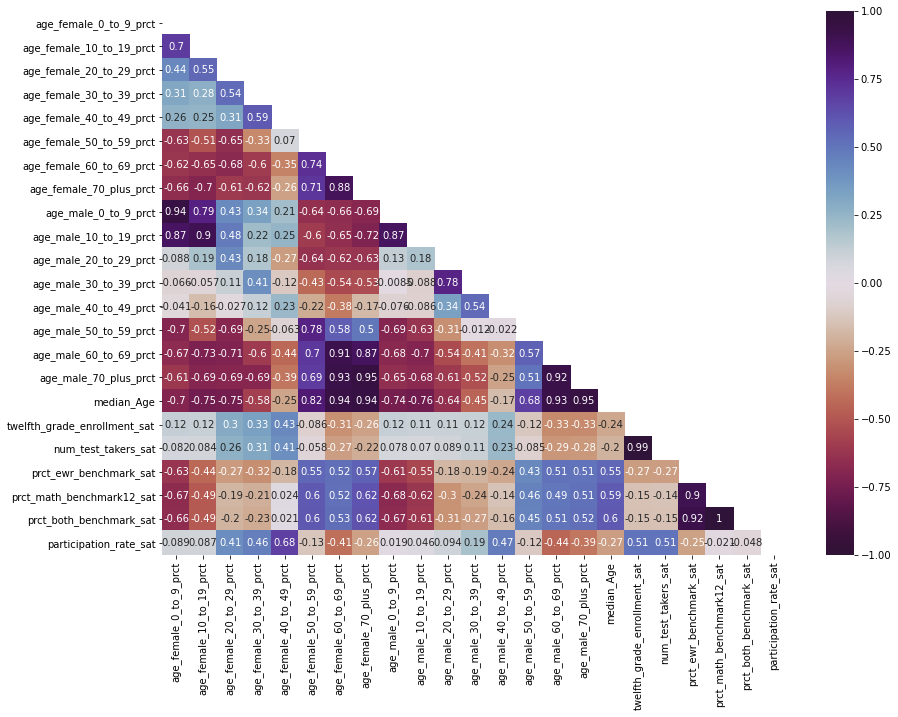

In [69]:
plt.figure(figsize = (14,10))

sat_corr = sat_census_age_df.corr()
sat_corr

mask = np.zeros_like(sat_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = sat_corr,
            annot = True, 
            vmin = -1,
            vmax = 1,
            mask = mask,
            cmap = 'twilight_shifted_r');

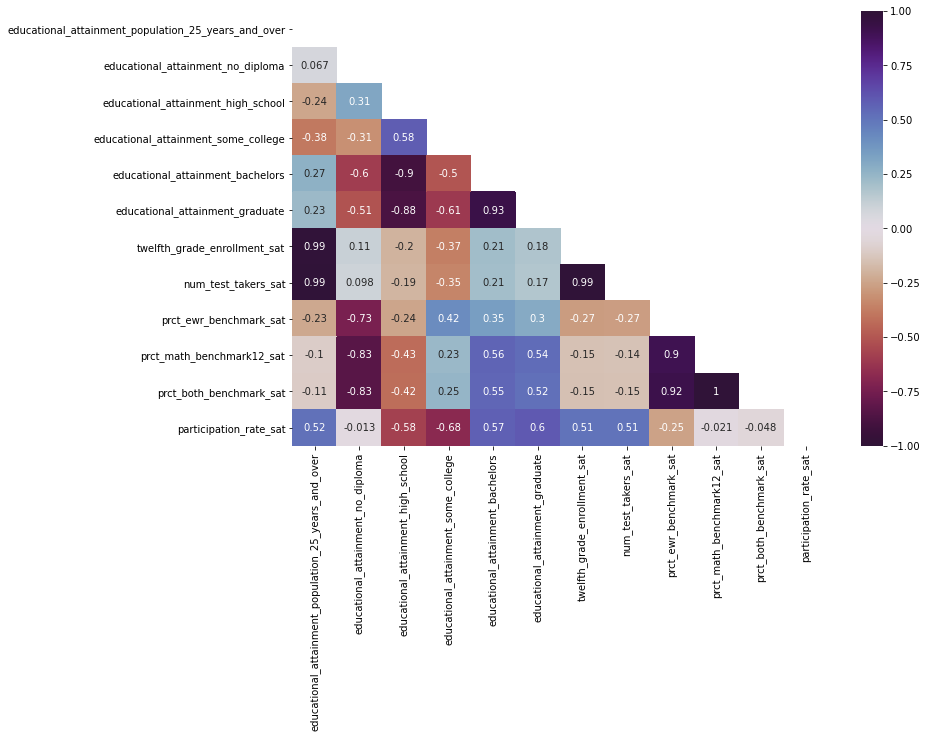

In [70]:
plt.figure(figsize = (12,8))

sat_corr = sat_census_education_df.corr()
sat_corr

mask = np.zeros_like(sat_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = sat_corr,
            annot = True, 
            vmin = -1,
            vmax = 1,
            mask = mask,
            cmap = 'twilight_shifted_r');

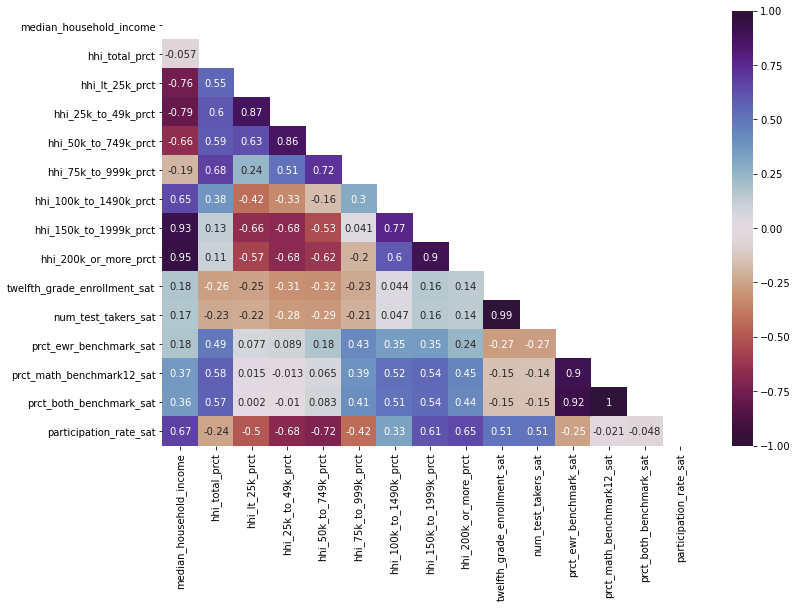

In [71]:
plt.figure(figsize = (12,8))

sat_corr = sat_census_income_df.corr()
sat_corr

mask = np.zeros_like(sat_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = sat_corr,
            annot = True, 
            vmin = -1,
            vmax = 1,
            mask = mask,
            cmap = 'twilight_shifted_r');

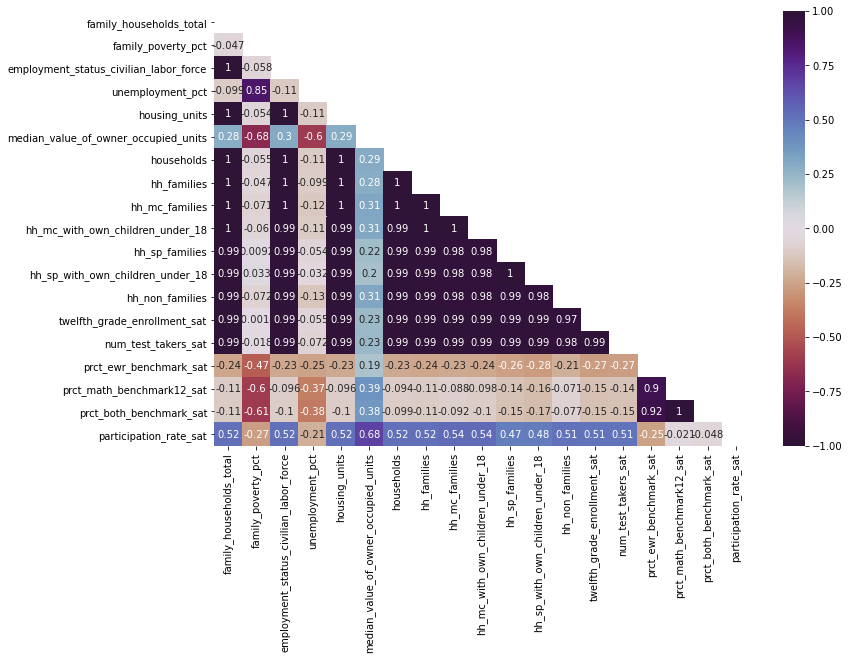

In [72]:
plt.figure(figsize = (12,8))

sat_corr = sat_census_house_df.corr()
sat_corr

mask = np.zeros_like(sat_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = sat_corr,
            annot = True, 
            vmin = -1,
            vmax = 1,
            mask = mask,
            cmap = 'twilight_shifted_r');

## ACT & Demographic Correlation Matrices

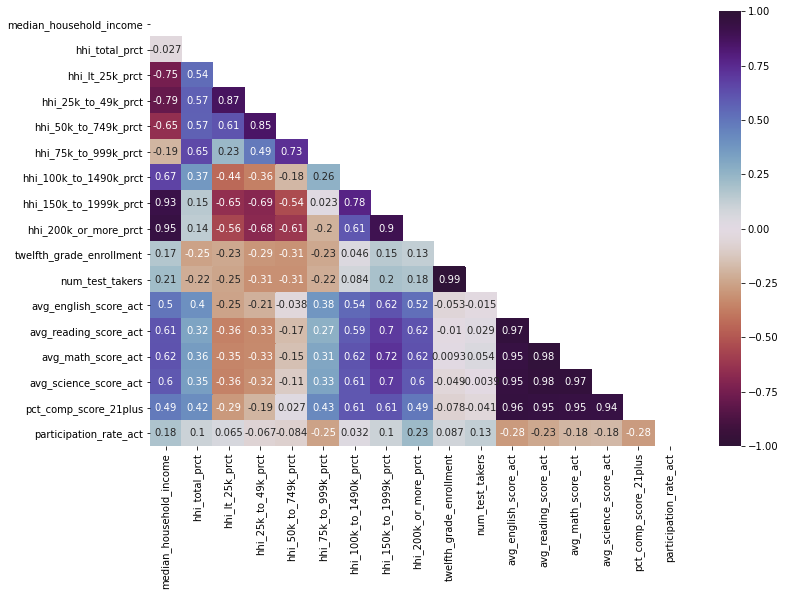

In [73]:
plt.figure(figsize = (12,8))

sat_corr = act_census_income_df.corr()
sat_corr

mask = np.zeros_like(sat_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = sat_corr,
            annot = True, 
            vmin = -1,
            vmax = 1,
            mask = mask,
            cmap = 'twilight_shifted_r');

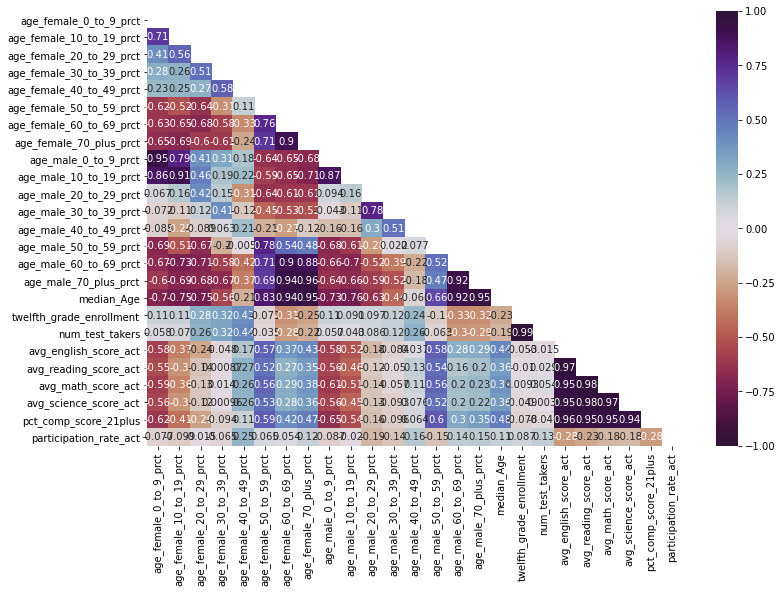

In [74]:
plt.figure(figsize = (12,8))

sat_corr = act_census_age_df.corr()
sat_corr

mask = np.zeros_like(sat_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = sat_corr,
            annot = True, 
            vmin = -1,
            vmax = 1,
            mask = mask,
            cmap = 'twilight_shifted_r');

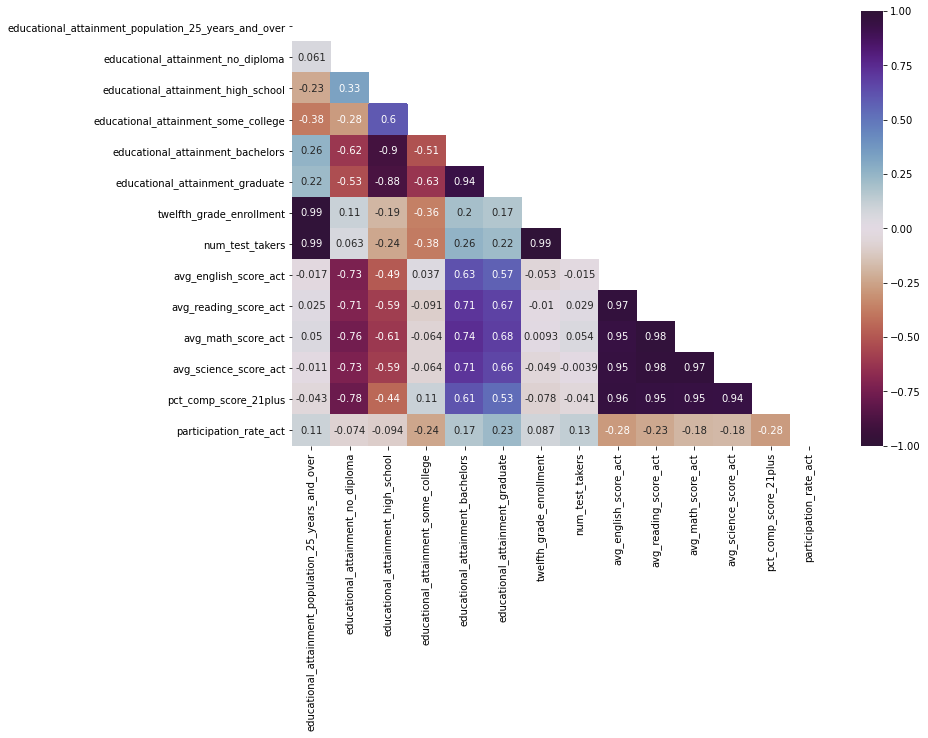

In [75]:
plt.figure(figsize = (12,8))

sat_corr = act_census_education_df.corr()
sat_corr

mask = np.zeros_like(sat_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = sat_corr,
            annot = True, 
            vmin = -1,
            vmax = 1,
            mask = mask,
            cmap = 'twilight_shifted_r');

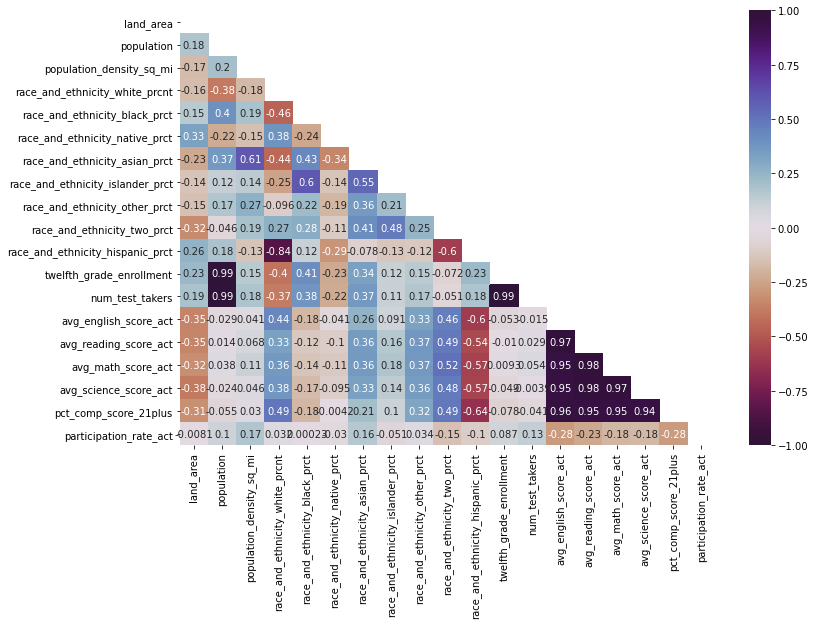

In [76]:
plt.figure(figsize = (12,8))

sat_corr = act_census_race_df.corr()
sat_corr

mask = np.zeros_like(sat_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = sat_corr,
            annot = True, 
            vmin = -1,
            vmax = 1,
            mask = mask,
            cmap = 'twilight_shifted_r');

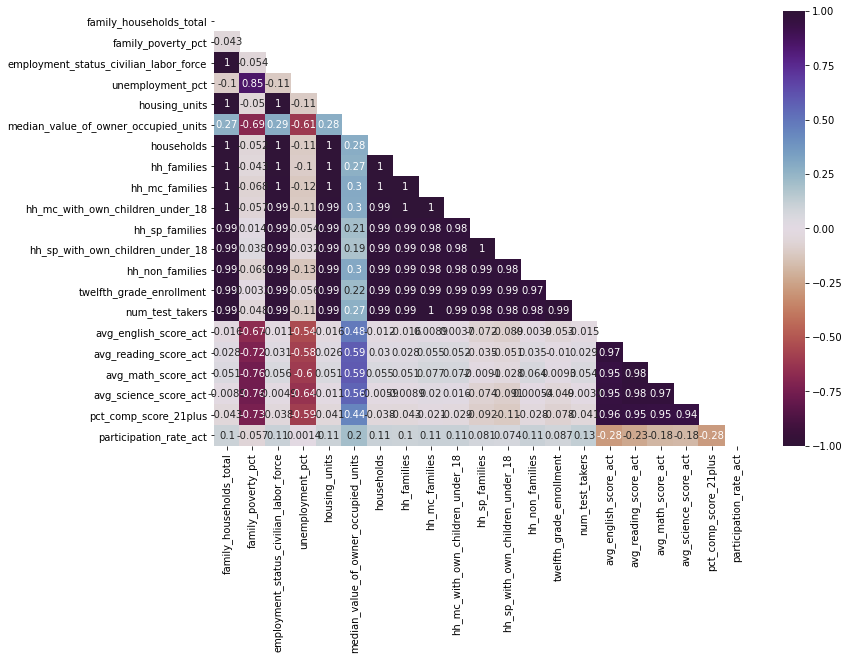

In [77]:
plt.figure(figsize = (12,8))

sat_corr = act_census_house_df.corr()
sat_corr

mask = np.zeros_like(sat_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = sat_corr,
            annot = True, 
            vmin = -1,
            vmax = 1,
            mask = mask,
            cmap = 'twilight_shifted_r');

From these charts, I can then create a list of the strongest variables correlated with participation rates and performance rates for the SAT and ACT, rescpectively from each demographic dataset. The idea is to pick demographic variables that will hopefully account for different facets of the causation of the test variables, ultimately creating a better predictive model.

#### Best demographic indicators for SAT particpation rates
1. Percent Pop. HH Income 50-79K (-.72)
2. Percent Pop. Asian (.68)
3. Percent Pop Female, Age 40-49 (.68)
4. Percent Pop Some College Education (-.68)
5. Median Value of Owner-Occupied Homes (.68)

#### Best demographic indicators for ACT particpation rates

1. Percent Pop. HH Income 50-79K (-.25)
2. Percent Pop Female, Age 40-49 (.25)
3. Percent Pop Some College Education (-.24)
4. Median Value of Owner-Occupied Homes (.20)
5. Population Density (.17)

#### Best demographic indicators for SAT performance rates

1. Percent Pop. No Diploma (-.83)
2. Percent Pop. Hispanic (-.73)
3. Percent Pop. Male Age 0-9 (-.67)
4. Percent Pop. Below Poverty Line (-.61)
5. Total Household Income (.57)

#### Best demographic indicators for ACT performance rates

1. Percent Pop. No Diploma (-.78)
2. Percent Pop. Hispanic (-.69)
3. Percent Pop. Below Poverty Line (-.73)
4. Percent Pop. Male Age 0-9 (-.65) 
5. Percent Pop HH Income 100-199K (.57)


# Frequency distributions 

## Histograms

<Figure size 432x720 with 0 Axes>

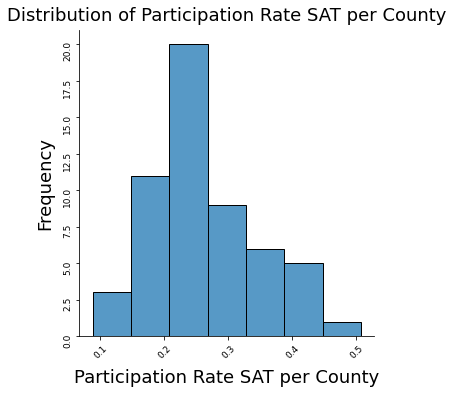

In [78]:
utl.my_hist(sat_df, "participation_rate_sat", 
                    'Distribution of Participation Rate SAT per County',
                    'Participation Rate SAT per County');

<Figure size 432x720 with 0 Axes>

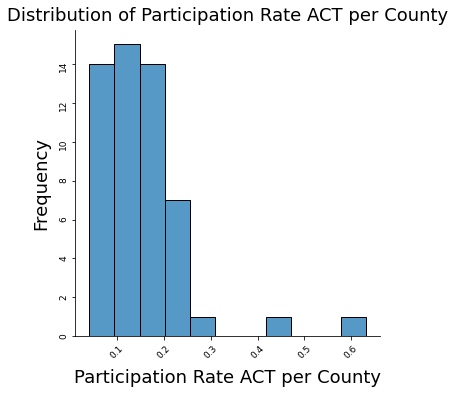

In [79]:
utl.my_hist(act_df,
            "participation_rate_act", 
            'Distribution of Participation Rate ACT per County',
            'Participation Rate ACT per County');

<Figure size 432x720 with 0 Axes>

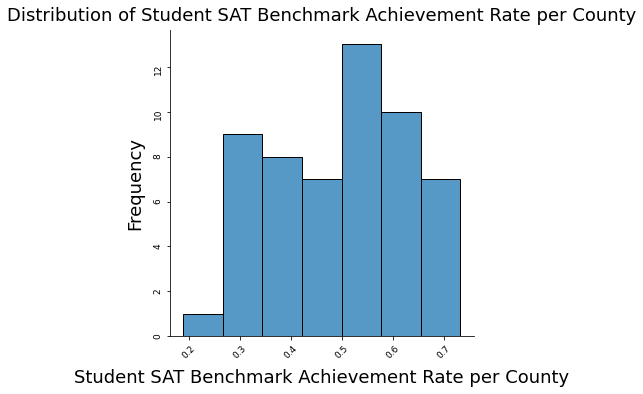

In [80]:
utl.my_hist(sat_df, "prct_both_benchmark_sat", 
                    'Distribution of Student SAT Benchmark Achievement Rate per County',
                    'Student SAT Benchmark Achievement Rate per County');

<Figure size 432x720 with 0 Axes>

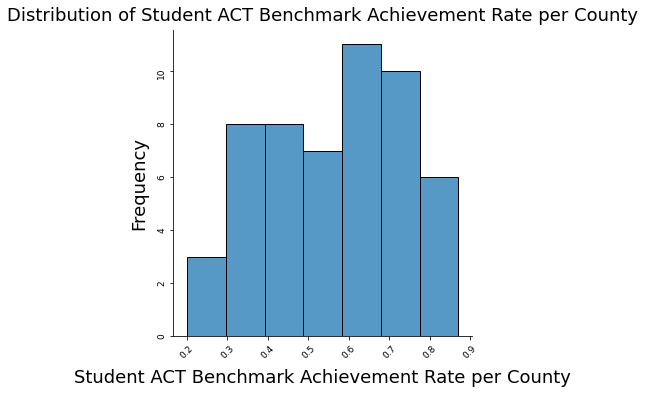

In [81]:
utl.my_hist(act_df, "pct_comp_score_21plus", 
                    'Distribution of Student ACT Benchmark Achievement Rate per County',
                    'Student ACT Benchmark Achievement Rate per County');

The histogram for SAT participation rates bear a slight resemblance to a normal distribtution, whereas the participation rates for the ACT are skewed much more to the right, with obvious outliers. The histograms for both test perfiranbce rates are very similar to one another; a slightly left-skewed normal distribution leaning towards uniformity, with no obvious outliers.  

## Boxplots

/Users/trevorodonnell/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of SAT Participation Rates')

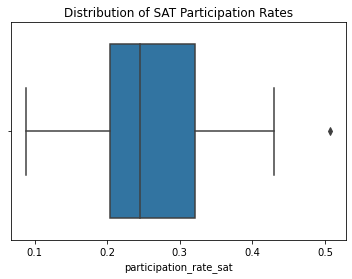

In [82]:
sns.boxplot(sat_df['participation_rate_sat']).set_title("Distribution of SAT Participation Rates")

/Users/trevorodonnell/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


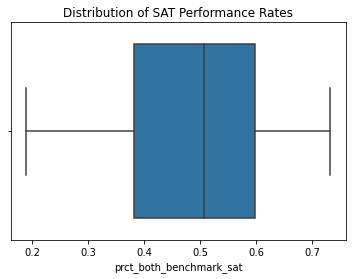

In [83]:
sns.boxplot(sat_df['prct_both_benchmark_sat']).set_title("Distribution of SAT Performance Rates");

/Users/trevorodonnell/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


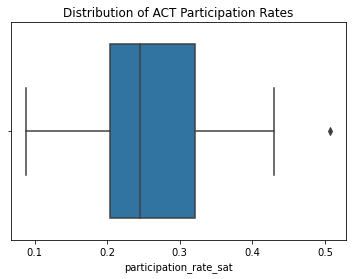

In [84]:
sns.boxplot(sat_df['participation_rate_sat']).set_title("Distribution of ACT Participation Rates");

/Users/trevorodonnell/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


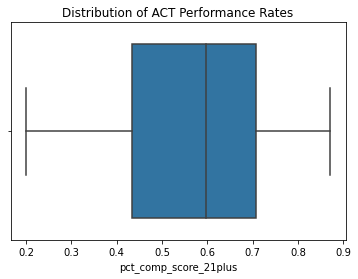

In [85]:
sns.boxplot(act_df['pct_comp_score_21plus']).set_title("Distribution of ACT Performance Rates");

The boxplots convey the same information as the histogram, but give us a more precise examinination – clearly illustrating the mean and deliniating outliers. 

# Scatter Plots

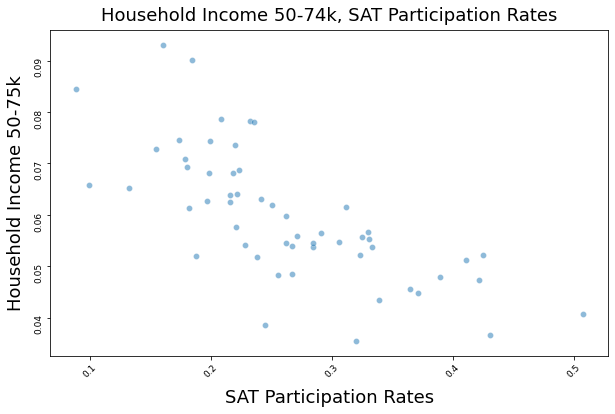

In [86]:
utl.my_scatterplot(sat_census_df, 
                   "participation_rate_sat",
                   "hhi_50k_to_749k_prct",
                   "Household Income 50-74k, SAT Participation Rates",
                   "SAT Participation Rates",
                   "Household Income 50-75k",
                   alpha = .5)

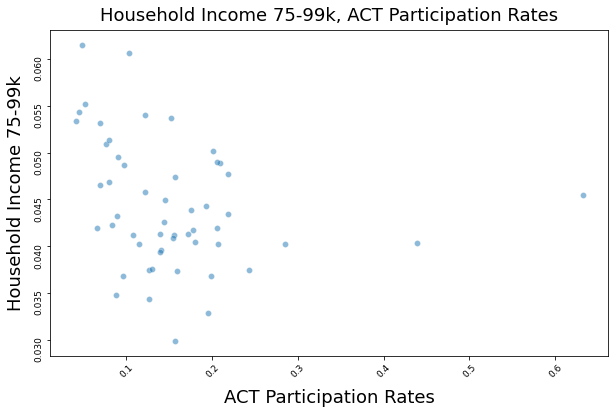

In [87]:
utl.my_scatterplot(act_census_df, 
                   "participation_rate_act",
                   "hhi_75k_to_999k_prct",
                   "Household Income 75-99k, ACT Participation Rates",
                   "ACT Participation Rates",
                   "Household Income 75-99k",
                   alpha = .5)

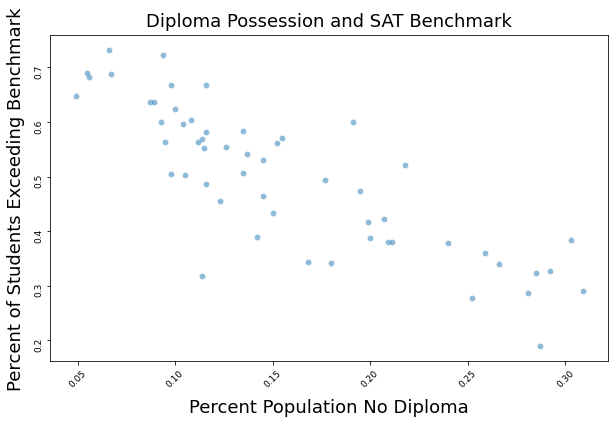

In [88]:
utl.my_scatterplot(sat_census_df, 
                   "educational_attainment_no_diploma",
                   "prct_both_benchmark_sat",
                   "Diploma Possession and SAT Benchmark",
                   "Percent Population No Diploma",
                   "Percent of Students Exceeding Benchmark",
                   alpha = .5)

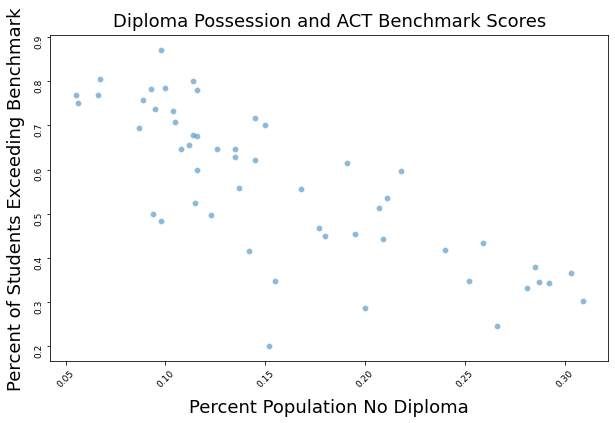

In [89]:
utl.my_scatterplot(act_census_df, 
                   "educational_attainment_no_diploma",
                   "pct_comp_score_21plus",
                   "Diploma Possession and ACT Benchmark Scores",
                   "Percent Population No Diploma",
                   "Percent of Students Exceeding Benchmark",
                   alpha = .5)

These scatter-plots are used to more finely illustrate the relationship between our target test variables and the demographic variables that they are most strongly correlated to. 

# Recommendations

Nevada, Tuolumne, Mono,  and Inyo counties all appear in the top five lowest participating counties, for both tests.
Merced and Madera counties suffer from lower composite scores on both tests.
Based on what can be inferred from the strength of the correlation indicators, resources for participation should be focused on communities with lower median values of owner-occupied homes and less educational attainment. Resources for test performance should likewise be focused on younger communities with less educational attainment and larger Hispanic communities.
